In [1]:
!pip install yfinance


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf
import pandas as pd

tcs = yf.download("TCS.NS", start="2020-01-01", end="2024-12-31")

print(tcs.head())


C:\Users\ACER\AppData\Local\Temp\ipykernel_14264\930801219.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tcs = yf.download("TCS.NS", start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open   Volume
Ticker           TCS.NS       TCS.NS       TCS.NS       TCS.NS   TCS.NS
Date                                                                   
2020-01-01  1995.460327  2010.465684  1982.940280  1995.828471  1354908
2020-01-02  1986.300049  2006.829138  1978.521151  2006.829138  2380752
2020-01-03  2025.885498  2046.460665  1992.146144  1992.146144  4655761
2020-01-06  2025.701416  2049.176336  2014.148028  2029.890123  3023209
2020-01-07  2030.672729  2038.773699  2010.373783  2025.747509  2429317


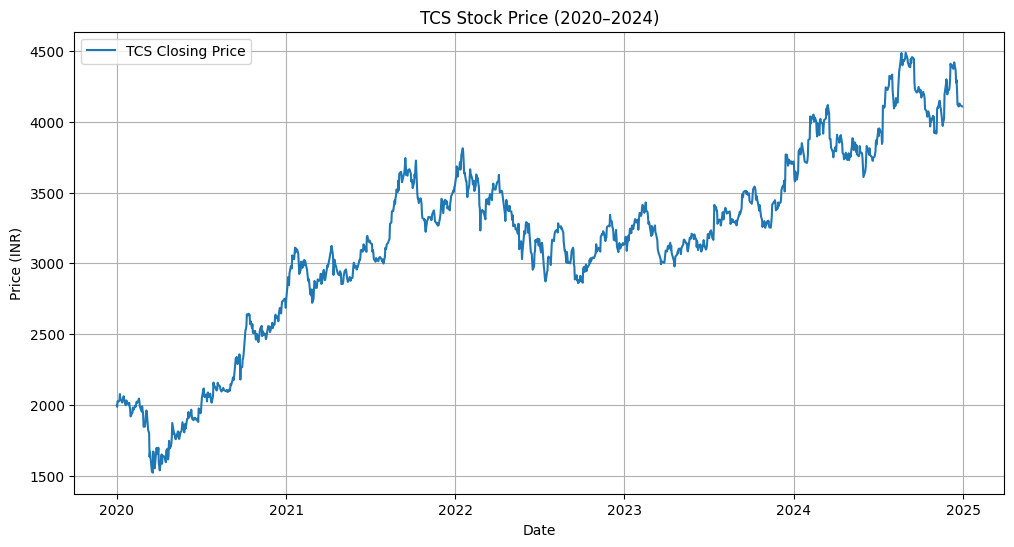

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(tcs['Close'], label='TCS Closing Price')
plt.title("TCS Stock Price (2020–2024)")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.grid(True)
plt.show()


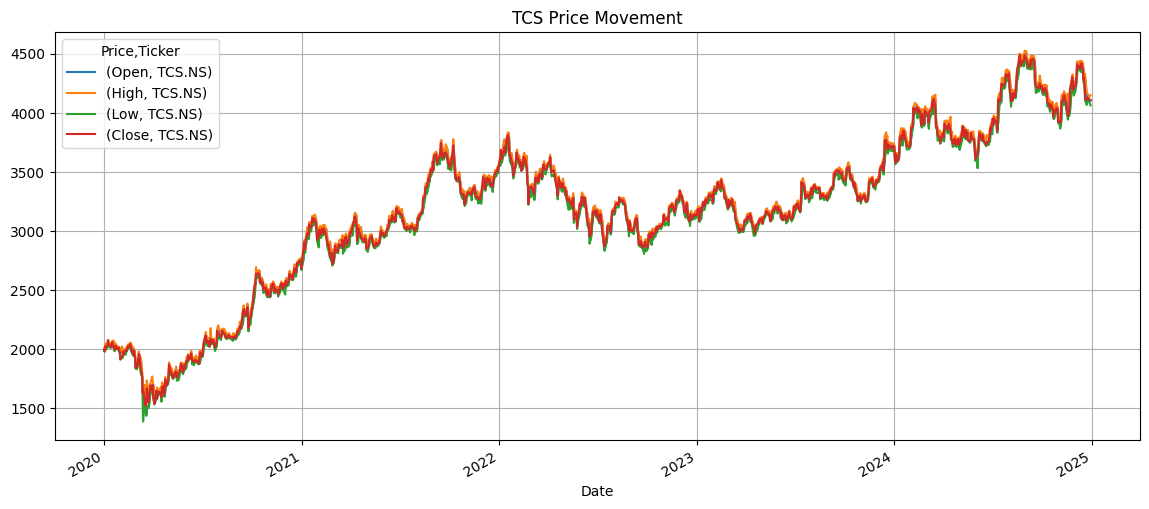

In [6]:
tcs[['Open', 'High', 'Low', 'Close']].plot(figsize=(14,6), title='TCS Price Movement')
plt.grid(True)
plt.show()


In [7]:
print(tcs.columns)

MultiIndex([( 'Close', 'TCS.NS'),
            (  'High', 'TCS.NS'),
            (   'Low', 'TCS.NS'),
            (  'Open', 'TCS.NS'),
            ('Volume', 'TCS.NS')],
           names=['Price', 'Ticker'])


In [8]:
print(tcs.isnull().sum())

Price   Ticker
Close   TCS.NS    0
High    TCS.NS    0
Low     TCS.NS    0
Open    TCS.NS    0
Volume  TCS.NS    0
dtype: int64


In [10]:
tcs_clean = tcs.dropna()

In [11]:
print("Before:", tcs.shape)
print("After :", tcs_clean.shape)

Before: (1237, 5)
After : (1237, 5)


In [24]:
import yfinance as yf
import pandas as pd
import numpy as np

df = yf.download("TCS.NS", start="2020-01-01", end="2024-12-31")
df.dropna(inplace=True)

delta = df['Close'].diff()

gain = delta.clip(lower=0)   
loss = -delta.clip(upper=0)    

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))

df['RSI'] = rsi

print(df[['Close', 'RSI']].tail(10))


C:\Users\ACER\AppData\Local\Temp\ipykernel_14264\4139749650.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TCS.NS", start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed

Price             Close        RSI
Ticker           TCS.NS           
Date                              
2024-12-16  4361.500488  56.483399
2024-12-17  4275.854980  49.630868
2024-12-18  4294.969727  60.718432
2024-12-19  4219.942871  50.098998
2024-12-20  4119.578613  41.506212
2024-12-23  4107.724609  38.197540
2024-12-24  4128.666992  34.961285
2024-12-26  4118.393555  19.419435
2024-12-27  4114.195312  20.012866
2024-12-30  4108.218750  18.615599


In [25]:
df['SMA_20'] = df['Close'].rolling(window=20).mean()

In [26]:
delta = df['Close'].diff()

gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

In [27]:
print(df[['Close', 'RSI']].isnull().sum())  # to count missing values
print(df[['Close', 'RSI']].dropna().head(5))  # show the first valid RSI values

Price  Ticker
Close  TCS.NS       0
RSI              1237
dtype: int64
Empty DataFrame
Columns: [(Close, TCS.NS), (RSI, )]
Index: []


In [28]:
df['SMA_20'] = df['Close'].rolling(window=20).mean()
exp1 = df['Close'].ewm(span=12, adjust=False).mean()
exp2 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = exp1 - exp2
df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

def classify_trend(row):
    if row['RSI'] > 70 and row['MACD'] > row['MACD_Signal'] and row['Close'] > row['SMA_20']:
        return 'Bullish'
    elif row['RSI'] < 30 and row['MACD'] < row['MACD_Signal'] and row['Close'] < row['SMA_20']:
        return 'Bearish'
    else:
        return 'Neutral'

df['Trend'] = df.apply(classify_trend, axis=1)

print(df[['Close', 'RSI', 'MACD', 'MACD_Signal', 'SMA_20', 'Trend']].tail(10))


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [40]:
import yfinance as yf
import pandas as pd

df = yf.download("TCS.NS", start="2020-01-01", end="2024-12-31")
print("Columns:", df.columns)
print(df.head())


C:\Users\ACER\AppData\Local\Temp\ipykernel_14264\276798148.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TCS.NS", start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed

Columns: MultiIndex([( 'Close', 'TCS.NS'),
            (  'High', 'TCS.NS'),
            (   'Low', 'TCS.NS'),
            (  'Open', 'TCS.NS'),
            ('Volume', 'TCS.NS')],
           names=['Price', 'Ticker'])
Price             Close         High          Low         Open   Volume
Ticker           TCS.NS       TCS.NS       TCS.NS       TCS.NS   TCS.NS
Date                                                                   
2020-01-01  1995.460327  2010.465684  1982.940280  1995.828471  1354908
2020-01-02  1986.300049  2006.829138  1978.521151  2006.829138  2380752
2020-01-03  2025.885498  2046.460665  1992.146144  1992.146144  4655761
2020-01-06  2025.701416  2049.176336  2014.148028  2029.890123  3023209
2020-01-07  2030.672729  2038.773699  2010.373783  2025.747509  2429317


In [41]:
delta = df['Close'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

print("✅ RSI added:", 'RSI' in df.columns)
print(df[['Close', 'RSI']].tail())


✅ RSI added: True
Price             Close        RSI
Ticker           TCS.NS           
Date                              
2024-12-23  4107.724609  38.197540
2024-12-24  4128.666992  34.961285
2024-12-26  4118.393555  19.419435
2024-12-27  4114.195312  20.012866
2024-12-30  4108.218750  18.615599


In [42]:
df['SMA_20'] = df['Close'].rolling(window=20).mean()

print("✅ SMA_20 added:", 'SMA_20' in df.columns)
print(df[['Close', 'SMA_20']].tail())

✅ SMA_20 added: True
Price             Close       SMA_20
Ticker           TCS.NS             
Date                                
2024-12-23  4107.724609  4295.977051
2024-12-24  4128.666992  4287.422363
2024-12-26  4118.393555  4279.349268
2024-12-27  4114.195312  4275.395459
2024-12-30  4108.218750  4269.861108


In [43]:
ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
ema_26 = df['Close'].ewm(span=26, adjust=False).mean()

df['MACD'] = ema_12 - ema_26
df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

print("✅ MACD columns added:", 'MACD' in df.columns and 'MACD_Signal' in df.columns)
print(df[['MACD', 'MACD_Signal']].tail())


✅ MACD columns added: True
Price            MACD MACD_Signal
Ticker                           
Date                             
2024-12-23  11.434588   46.492715
2024-12-24   0.622865   37.318745
2024-12-26  -8.674490   28.120098
2024-12-27 -16.194790   19.257120
2024-12-30 -22.378970   10.929902


In [44]:
df.dropna(subset=['RSI', 'SMA_20', 'MACD', 'MACD_Signal'], inplace=True)

def classify_trend(row):
    if row['RSI'] > 70 and row['MACD'] > row['MACD_Signal'] and row['Close'] > row['SMA_20']:
        return 'Bullish'
    elif row['RSI'] < 30 and row['MACD'] < row['MACD_Signal'] and row['Close'] < row['SMA_20']:
        return 'Bearish'
    else:
        return 'Neutral'

df['Trend'] = df.apply(classify_trend, axis=1)

print(df[['Close', 'RSI', 'MACD', 'MACD_Signal', 'SMA_20', 'Trend']].tail(10))

KeyError: ['RSI', 'SMA_20', 'MACD', 'MACD_Signal']

In [45]:
print(df.columns)


MultiIndex([(      'Close', 'TCS.NS'),
            (       'High', 'TCS.NS'),
            (        'Low', 'TCS.NS'),
            (       'Open', 'TCS.NS'),
            (     'Volume', 'TCS.NS'),
            (        'RSI',       ''),
            (     'SMA_20',       ''),
            (       'MACD',       ''),
            ('MACD_Signal',       '')],
           names=['Price', 'Ticker'])


In [46]:
df['RSI']

Date
2020-01-01          NaN
2020-01-02          NaN
2020-01-03          NaN
2020-01-06          NaN
2020-01-07          NaN
                ...    
2024-12-23    38.197540
2024-12-24    34.961285
2024-12-26    19.419435
2024-12-27    20.012866
2024-12-30    18.615599
Name: RSI, Length: 1237, dtype: float64

In [47]:
df.columns = ['_'.join(filter(None, col)) for col in df.columns.values]

df.dropna(subset=['RSI', 'SMA_20', 'MACD', 'MACD_Signal'], inplace=True)

def classify_trend(row):
    if row['RSI'] > 70 and row['MACD'] > row['MACD_Signal'] and row['Close_TCS.NS'] > row['SMA_20']:
        return 'Bullish'
    elif row['RSI'] < 30 and row['MACD'] < row['MACD_Signal'] and row['Close_TCS.NS'] < row['SMA_20']:
        return 'Bearish'
    else:
        return 'Neutral'

df['Trend'] = df.apply(classify_trend, axis=1)

print(df[['Close_TCS.NS', 'RSI', 'MACD', 'MACD_Signal', 'SMA_20', 'Trend']].tail(10))


            Close_TCS.NS        RSI       MACD  MACD_Signal       SMA_20  \
Date                                                                       
2024-12-16   4361.500488  56.483399  77.189649    68.924869  4267.070520   
2024-12-17   4275.854980  49.630868  66.264703    68.392836  4282.332617   
2024-12-18   4294.969727  60.718432  58.474942    66.409257  4297.560144   
2024-12-19   4219.942871  50.098998  45.720424    62.271490  4307.391577   
2024-12-20   4119.578613  41.506212  27.200272    55.257247  4303.721729   
2024-12-23   4107.724609  38.197540  11.434588    46.492715  4295.977051   
2024-12-24   4128.666992  34.961285   0.622865    37.318745  4287.422363   
2024-12-26   4118.393555  19.419435  -8.674490    28.120098  4279.349268   
2024-12-27   4114.195312  20.012866 -16.194790    19.257120  4275.395459   
2024-12-30   4108.218750  18.615599 -22.378970    10.929902  4269.861108   

              Trend  
Date                 
2024-12-16  Neutral  
2024-12-17  Neutral  

In [48]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


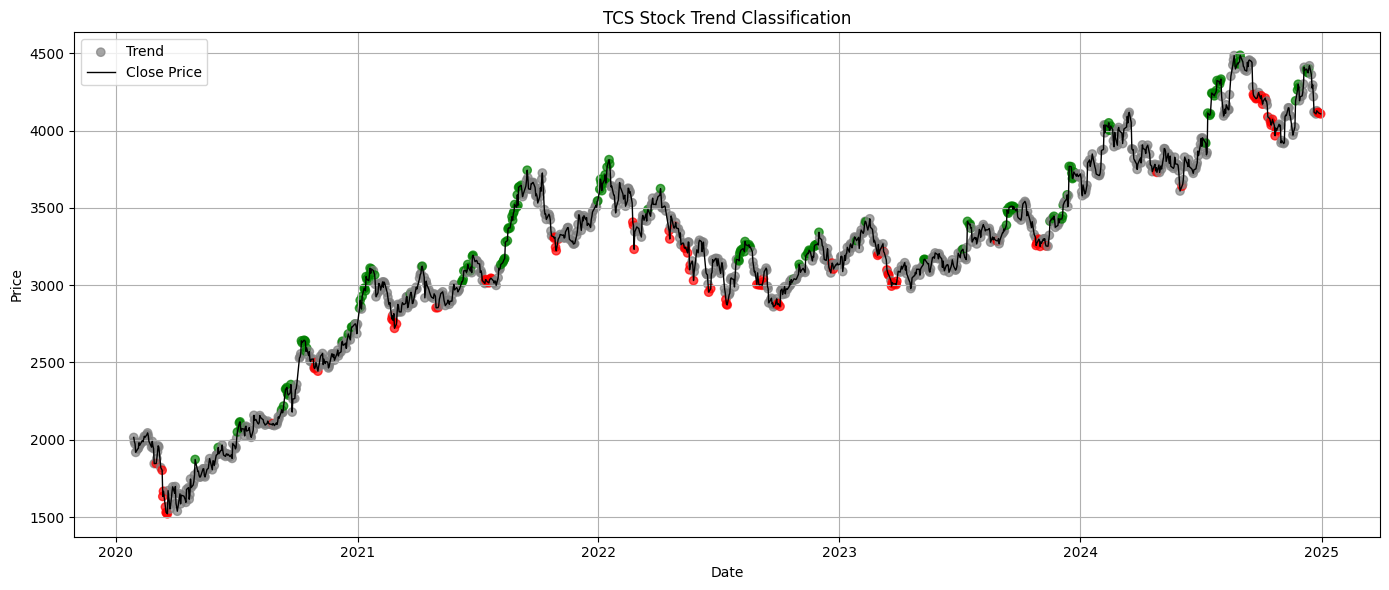

In [49]:
import matplotlib.pyplot as plt

df = df.copy()
df.reset_index(inplace=True)

color_map = {
    'Bullish': 'green',
    'Bearish': 'red',
    'Neutral': 'gray'
}
df['Color'] = df['Trend'].map(color_map)

plt.figure(figsize=(14, 6))
plt.scatter(df['Date'], df['Close_TCS.NS'], c=df['Color'], label='Trend', alpha=0.7)
plt.plot(df['Date'], df['Close_TCS.NS'], color='black', linewidth=1, label='Close Price')

plt.title('TCS Stock Trend Classification')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
df_2024 = df[df['Date'].dt.year == 2024]

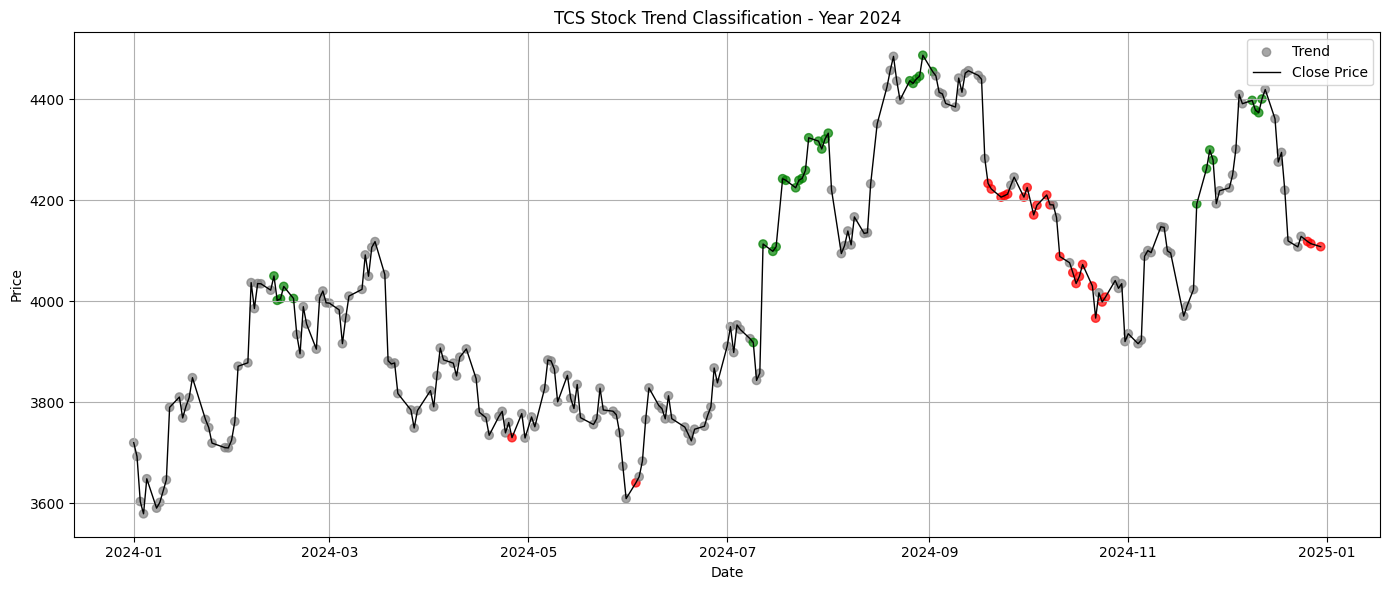

In [51]:
import matplotlib.pyplot as plt

df_2024 = df[df['Date'].dt.year == 2024].copy()

color_map = {
    'Bullish': 'green',
    'Bearish': 'red',
    'Neutral': 'gray'
}
df_2024['Color'] = df_2024['Trend'].map(color_map)

plt.figure(figsize=(14, 6))
plt.scatter(df_2024['Date'], df_2024['Close_TCS.NS'], c=df_2024['Color'], label='Trend', alpha=0.7)
plt.plot(df_2024['Date'], df_2024['Close_TCS.NS'], color='black', linewidth=1, label='Close Price')

plt.title('TCS Stock Trend Classification - Year 2024')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score


In [53]:
features = ['RSI', 'MACD', 'MACD_Signal', 'SMA_20', 'Close_TCS.NS']
X = df[features]
y = df['Trend']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [54]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [55]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.9959016393442623

Classification Report:
               precision    recall  f1-score   support

     Bearish       1.00      0.95      0.98        22
     Bullish       1.00      1.00      1.00        45
     Neutral       0.99      1.00      1.00       177

    accuracy                           1.00       244
   macro avg       1.00      0.98      0.99       244
weighted avg       1.00      1.00      1.00       244



In [56]:
import joblib

joblib.dump(model, 'tcs_trend_model.pkl')

joblib.dump(le, 'trend_label_encoder.pkl')


['trend_label_encoder.pkl']